# EDA

## Dependence

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://github.com/matheusmas132/Retweets-Network-Analysis/raw/main/data/argentinian.xlsx
!wget https://github.com/matheusmas132/Retweets-Network-Analysis/raw/main/data/brazilian.xlsx

--2021-09-15 03:03:37--  https://github.com/matheusmas132/Retweets-Network-Analysis/raw/main/data/argentinian.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/matheusmas132/Retweets-Network-Analysis/main/data/argentinian.xlsx [following]
--2021-09-15 03:03:37--  https://raw.githubusercontent.com/matheusmas132/Retweets-Network-Analysis/main/data/argentinian.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3162978 (3.0M) [application/octet-stream]
Saving to: ‘argentinian.xlsx’

argentinian.xlsx    100%[===================>]   3.02M  --.-KB/s    in 0.07s   

2021-09-15 03:03:38 (43.8 MB/s) 

In [ ]:
brazilian_db = pd.read_excel("brazilian.xlsx", converters={'id_str':str,'user_id_str':str,'retweeted_id_str':str, 'retweeted_user_id_str':str})
argentinian_db = pd.read_excel("argentinian.xlsx", converters={'id_str':str,'user_id_str':str,'retweeted_id_str':str, 'retweeted_user_id_str':str})

brazilian_db.info()
'argentinian_db.info()'

In [ ]:
brazilian_db.columns

Index(['created_at', 'id_str', 'text', 'truncated', 'is_quote_status',
       'retweet_count', 'favorite_count', 'user_id_str', 'user_name',
       'user_screen_name', 'user_location', 'is_verified_user',
       'user_followers_count', 'user_friends_count', 'retweeted_created_at',
       'retweeted_id_str', 'retweeted_text', 'retweeted_truncated',
       'retweeted_user_id_str', 'retweeted_user_name',
       'retweeted_user_screen_name', 'retweeted_user_location',
       'retweeted_is_verified_user', 'retweeted_user_followers_count',
       'retweeted_user_friends_count', 'retweeted_is_quote_status',
       'retweeted_retweet_count', 'retweeted_favorite_count'],
      dtype='object')

## Data cleaning

In [ ]:
brazilian_db['created_at'].str.contains('Sun Sep 05', regex=False).value_counts(dropna = False)

True     17659
False       28
Name: created_at, dtype: int64

In [ ]:
brazilian_db = brazilian_db[brazilian_db['created_at'].str.contains('Sun Sep 05', regex=False)]

In [ ]:
brazilian_db

,created_at,id_str,text,truncated,is_quote_status,retweet_count,favorite_count,user_id_str,user_name,user_screen_name,user_location,is_verified_user,user_followers_count,user_friends_count,retweeted_created_at,retweeted_id_str,retweeted_text,retweeted_truncated,retweeted_user_id_str,retweeted_user_name,retweeted_user_screen_name,retweeted_user_location,retweeted_is_verified_user,retweeted_user_followers_count,retweeted_user_friends_count,retweeted_is_quote_status,retweeted_retweet_count,retweeted_favorite_count
0,Sun Sep 05 23:59:59 +0000 2021,1434667659577204737,RT @contagemcorona1: 🚨URGENTE \n\nAnvisa inter...,False,False,232,0,870317170596696064,João Belfort,JohnyBelfort,NaN,False,79,681,Sun Sep 05 19:20:28 +0000 2021,1434597316166656004,🚨URGENTE \n\nAnvisa interrompeu Brasil x Argen...,1.0,1245441853740191753,Contagem coronavírus - Brasil (Notícias 24 horas),contagemcorona1,Brasil,False,32811.0,454.0,0.0,232.0,1287.0
1,Sun Sep 05 23:59:57 +0000 2021,1434667650525892609,RT @pauloteixeira13: Presidente delinquente in...,False,False,196,0,191640915,Rosinaldo JB Ribeiro 🚩,RibeirosXingu,"Rio Xingu, S.Félix Xingu PA",False,452,767,Sun Sep 05 19:19:47 +0000 2021,1434597143789064195,Presidente delinquente interrompe partida de f...,0.0,25562342,Paulo Teixeira,pauloteixeira13,"ÜT: -23.542504,-46.657429",True,221217.0,67420.0,0.0,196.0,1816.0
2,Sun Sep 05 23:59:57 +0000 2021,1434667648995020809,BRASIL X ARGENTINA https://t.co/wR63WsVWwW,False,False,0,0,262460609,RODRIGO GODOI,RGODOI_OFICIAL,"Governador Valadares, Brasil",False,421,1120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sun Sep 05 23:59:56 +0000 2021,1434667647837343746,RT @OGuardiaoSP: Argentina não cumpre protocol...,False,False,37,0,1088409092815814657,Sarinha Petterle,PetterleSarinha,RS,False,4346,3384,Sun Sep 05 22:56:17 +0000 2021,1434651630293635073,"Argentina não cumpre protocolo sanitário, Anvi...",1.0,1153794949336444928,Combatente 🇧🇷,OGuardiaoSP,NaN,False,16795.0,15751.0,0.0,37.0,159.0
4,Sun Sep 05 23:59:55 +0000 2021,1434667644553211904,RT @JoaquinTeixeira: O QUE MAIS ME DEIXOU CHOC...,False,False,1054,0,43970768,Carlos Eugenio Rezende,EugenioRezende,Brasil,False,175,157,Sun Sep 05 22:31:23 +0000 2021,1434645361549795334,O QUE MAIS ME DEIXOU CHOCADO NESSE JOGO BRASIL...,0.0,464128120,Joaquin Teixeira,JoaquinTeixeira,SEJA MEMBRO BRASIL PARALELO 👇,False,285850.0,4814.0,0.0,1054.0,10583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17682,Sun Sep 05 13:08:01 +0000 2021,1434503585669292033,Brasil e Argentina logo cedo aiai vamo brasa,False,False,1,0,970490826013990913,John,gJohncg,"Vitória, Brasil",False,119,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17683,Sun Sep 05 12:51:11 +0000 2021,1434499349384474629,AO VIVO: Brasil decide o título sul-americano ...,False,False,9,198,10842792,ge,geglobo,Brasil,True,5368794,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17684,Sun Sep 05 13:00:21 +0000 2021,1434501655865839616,"ACORDEI NÉ E TALS, AÍ FUI NA COZINHA TOMAR UM ...",True,False,2,25,1366101294071578626,juridico jake gyllenhaal,dinlenrau,NaN,False,6521,4333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17685,Sun Sep 05 13:23:31 +0000 2021,1434507488867520513,LIGUEM A TV ESTÁ PASSANDO VÔLEI BRASIL X ARGEN...,False,False,1,3,2258318731,susana ⎊🌈,susanafbrm,Rio de Janeiro,False,3381,3181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
brazilian_db = brazilian_db.sort_values(by='retweet_count', ascending=False)
brazilian_db_tt = brazilian_db[brazilian_db['retweeted_id_str'].isna()].head()
brazilian_db_tt

,created_at,id_str,text,truncated,is_quote_status,retweet_count,favorite_count,user_id_str,user_name,user_screen_name,user_location,is_verified_user,user_followers_count,user_friends_count,retweeted_created_at,retweeted_id_str,retweeted_text,retweeted_truncated,retweeted_user_id_str,retweeted_user_name,retweeted_user_screen_name,retweeted_user_location,retweeted_is_verified_user,retweeted_user_followers_count,retweeted_user_friends_count,retweeted_is_quote_status,retweeted_retweet_count,retweeted_favorite_count
16946,Sun Sep 05 19:44:38 +0000 2021,1434603399203467266,IMAGINA O DESESPERO DO MENDONÇA AMANHÃ NA REPA...,True,False,12214,66322,1205585363957436416,CPI DOS MEMES,cpidosmemes,ative as notificações,False,48150,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14000,Sun Sep 05 19:34:01 +0000 2021,1434600727880638464,Então quer dizer que a Argentina tentou implac...,False,False,7816,71890,226542162,Felipe Castanhari,FeCastanhari,"Osasco, SP",True,7379450,1690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17541,Sun Sep 05 21:02:58 +0000 2021,1434623111236882435,"Beleza, todo mundo entendeu q os jogadores da ...",True,False,4820,24701,1087259768,TeAtualizei 🇧🇷👊🏻❤️,taoquei1,NaN,False,615902,1555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,Sun Sep 05 23:58:16 +0000 2021,1434667226787942408,neymagro e confusao no brasil x argentina http...,False,False,4781,23169,1382456754009694211,comentaristaedu,comentaristaedu,NaN,False,40360,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17344,Wed Sep 01 04:02:38 +0000 2021,1432916785737654275,"Em Portugal Cristiano Ronaldo é amado, na Arge...",True,False,4331,23429,1424567220311666695,adulto Neymar FC,adultoneymarjrr,"Paris, France",False,415,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
argentinian_db = argentinian_db.sort_values(by='retweet_count', ascending=False)
argentinian_db_tt = argentinian_db[argentinian_db['retweeted_id_str'].isna()].head()
argentinian_db_tt

,created_at,id_str,text,truncated,is_quote_status,retweet_count,favorite_count,user_id_str,user_name,user_screen_name,user_location,is_verified_user,user_followers_count,user_friends_count,retweeted_created_at,retweeted_id_str,retweeted_text,retweeted_truncated,retweeted_user_id_str,retweeted_user_name,retweeted_user_screen_name,retweeted_user_location,retweeted_is_verified_user,retweeted_user_followers_count,retweeted_user_friends_count,retweeted_is_quote_status,retweeted_retweet_count,retweeted_favorite_count
14000,Sun Sep 05 19:58:43 +0000 2021,1434606943772069889,"Por decisión del árbitro del partido, el encue...",True,False,9944,47537,1265260098,CONMEBOL.com,CONMEBOL,Sudamérica,True,1577629,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16939,Sun Sep 05 18:57:53 +0000 2021,1434591631605370883,Porque la camiseta de Argentina tiene un parch...,False,False,7437,78709,135539946,Lucas Rodriguez,LuquitaRodrigue,NaN,False,190916,1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14001,Sun Sep 05 19:31:57 +0000 2021,1434600205211643910,🏆 #Eliminatorias\n\nEl encuentro entre #Brasil...,False,False,6124,38229,2495199115,Selección Argentina 🇦🇷,Argentina,Argentina,True,4140110,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18308,Wed Sep 01 14:01:40 +0000 2021,1433067537659572226,⚠️ ¡RECORDATORIO IMPORTANTE! ⚠️\nEl primer riv...,True,False,4906,32678,15590302,TyC Sports,TyCSports,NaN,True,2629164,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18329,Sat Aug 21 12:46:14 +0000 2021,1429062288414216201,Pobreza en Sudamérica 2021\n\n1.🇻🇪Venezuela: 8...,True,False,4198,7803,1356703597782855681,D R E S 🇨🇱,DresTrumpi,Chile. Te sigue,False,4100,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128074 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127464 missing from current font.
  fon

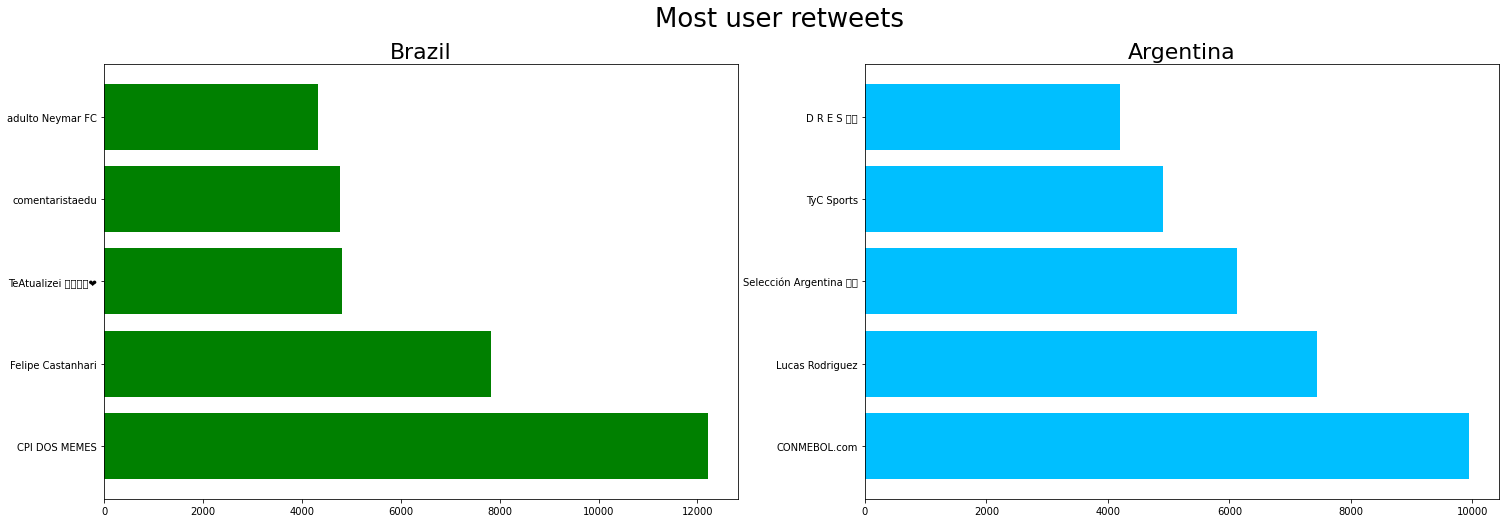

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize=(25,8))


brazilian_db_tt[['retweet_count', 'user_name']]
eixo_x_b = brazilian_db_tt['user_name']
eixo_y_b = brazilian_db_tt['retweet_count']
ax[0].barh(eixo_x_b, eixo_y_b, color = 'green')
ax[0].set_title('Brazil',fontsize = 22)

argentinian_db_tt[['retweet_count', 'user_name']]
eixo_x_b = argentinian_db_tt['user_name']
eixo_y_b = argentinian_db_tt['retweet_count']
ax[1].barh(eixo_x_b, eixo_y_b, color = 'deepskyblue')
ax[1].set_title('Argentina', fontsize = 22)

fig.suptitle("Most user retweets",fontsize = 26)
plt.show()


In [ ]:
''

#Network Analisys

## Dependence

In [ ]:
!wget https://github.com/matheusmas132/Retweets-Network-Analysis/raw/main/data/argentinian_tweets_net.graphml
!wget https://github.com/matheusmas132/Retweets-Network-Analysis/raw/main/data/brazilian_tweets_net.graphml
!wget https://github.com/matheusmas132/Retweets-Network-Analysis/raw/main/data/argentinian_users_net.graphml
!wget https://github.com/matheusmas132/Retweets-Network-Analysis/raw/main/data/brazilian_users_net.graphml


In [ ]:
!pip install networkx==2.6.2
import networkx as nt

In [ ]:
brazilian_tt_nw = nt.read_graphml('brazilian_tweets_net.graphml')
argentinian_tt_nw = nt.read_graphml('argentinian_tweets_net.graphml')
brazilian_users_nw = nt.read_graphml('brazilian_users_net.graphml')
argentinian_users_nw = nt.read_graphml('argentinian_users_net.graphml')

#out_degree

In [ ]:
brazilian_tt_nw.number_of_nodes()

node_sizes = [brazilian_tt_nw.out_degree(n, weight='weight') * 50 for n in brazilian_tt_nw.nodes]

%matplotlib inline
nx.draw(brazilian_tt_nw, node_size=node_sizes)

In [ ]:
nw_b_tt_od = pd.DataFrame(brazilian_tt_nw.out_degree())
nw_a_tt_od = pd.DataFrame(argentinian_tt_nw.out_degree())

nw_b_users_od = pd.DataFrame(brazilian_users_nw.out_degree())
nw_a_users_od = pd.DataFrame(argentinian_users_nw.out_degree())
#sort_values(by=1, ascending=False)

nw_b_tt_od = nw_b_tt_od.sort_values(by=1, ascending=False).head().rename(columns={0: "Twitee",1: "Metric"})
nw_a_tt_od = nw_a_tt_od.sort_values(by=1, ascending=False).head().rename(columns={0: "Twitee",1: "Metric"})
nw_b_users_od = nw_b_users_od.sort_values(by=1, ascending=False).head().rename(columns={0: "User",1: "Metric"})
nw_a_users_od = nw_a_users_od.sort_values(by=1, ascending=False).head().rename(columns={0: "User",1: "Metric"})

In [ ]:
print('Brazil twiters')
nw_b_tt_od

Brazil twiters


,Twitee,Metric
66,1434603399203467266,1676
68,1434631163788906512,554
61,1434600727880638464,554
6,1434645361549795334,394
202,1434601502602145798,321


In [ ]:
print('Argentina twiters')
nw_a_tt_od

Argentina twiters


,Twitee,Metric
32,1434591631605370883,534
202,1434606943772069889,309
2291,1434346146705678341,287
111,1434617250900762627,282
106,1434623713895460867,263


In [ ]:
print('Brazil users')
nw_b_users_od

Brazil users


,User,Metric
64,cpidosmemes,1676
31,LaurinhaIronic,632
60,FeCastanhari,554
6,JoaquinTeixeira,472
192,_andrebastosof2,321


In [ ]:
print('Argetina users')
nw_a_users_od

Argetina users


,User,Metric
31,LuquitaRodrigue,541
367,InvictosSomos,517
190,CONMEBOL,319
97,Juezcentral,309
102,dieschwartzman,282


In [ ]:
argentinian_users_nw.nodes['LuquitaRodrigue']

{'is_verified_user': False,
 'user_followers_count': 190917,
 'user_friends_count': 1346,
 'user_id_str': '135539946',
 'user_location': nan,
 'user_name': 'Lucas Rodriguez'}

#Degree centrality

In [ ]:
nw_b_tt_dc = pd.DataFrame(nx.degree_centrality(brazilian_tt_nw).items())
nw_a_tt_dc = pd.DataFrame(nx.degree_centrality(argentinian_tt_nw).items())

nw_b_users_dc = pd.DataFrame(nx.degree_centrality(brazilian_users_nw).items())
nw_a_users_dc = pd.DataFrame(nx.degree_centrality(argentinian_users_nw).items())

nw_b_tt_dc = nw_b_tt_dc.sort_values(by=1, ascending=False).head().rename(columns={0: "Twitee",1: "Metric"})
nw_a_tt_dc = nw_a_tt_dc.sort_values(by=1, ascending=False).head().rename(columns={0: "Twitee",1: "Metric"})
nw_b_users_dc = nw_b_users_dc.sort_values(by=1, ascending=False).head().rename(columns={0: "User",1: "Metric"})
nw_a_users_dc = nw_a_users_dc.sort_values(by=1, ascending=False).head().rename(columns={0: "User",1: "Metric"})

In [ ]:
print('Brazil twiters')
nw_b_tt_dc

Brazil twiters


,Twitee,Metric
66,1434603399203467266,0.115586
61,1434600727880638464,0.038207
68,1434631163788906512,0.038207
6,1434645361549795334,0.027172
202,1434601502602145798,0.022138


In [ ]:
print('Argentina twiters')
nw_a_tt_dc

Argentina twiters


,Twitee,Metric
32,1434591631605370883,0.035042
202,1434606943772069889,0.020277
2291,1434346146705678341,0.018833
111,1434617250900762627,0.018505
106,1434623713895460867,0.017258


In [ ]:
print('Brazil users')
nw_b_users_dc

Brazil users


,User,Metric
64,cpidosmemes,0.143924
31,LaurinhaIronic,0.054272
60,FeCastanhari,0.047574
6,JoaquinTeixeira,0.040532
192,_andrebastosof2,0.027565


In [ ]:
print('Argetina users')
nw_a_users_dc

Argetina users


,User,Metric
31,LuquitaRodrigue,0.045439
367,InvictosSomos,0.043423
190,CONMEBOL,0.026793
97,Juezcentral,0.025953
102,dieschwartzman,0.023686


#Betweenness Centrality

In [ ]:
nw_b_users_bc = pd.DataFrame(nx.betweenness_centrality(brazilian_users_nw).items())
nw_a_users_bc = pd.DataFrame(nx.betweenness_centrality(argentinian_users_nw).items())


In [ ]:
nw_b_users_bc = nw_b_users_bc.sort_values(by=1, ascending=False).head().rename(columns={0: "User",1: "Metric"})
nw_a_users_bc = nw_a_users_bc.sort_values(by=1, ascending=False).head().rename(columns={0: "User",1: "Metric"})

In [ ]:
print('Brazil users')
nw_b_users_bc

Brazil users


,User,Metric
10360,Cibelly_BC,3.834967e-07
1724,manuoliveirarj,1.696235e-07
1429,mvitorodrigues,1.179990e-07
2026,MomentsBrasil,1.106241e-07
1422,liz_niter,1.032491e-07


In [ ]:
print('Argetina users')
nw_a_users_bc

Argetina users


,User,Metric
182,todonoticias,1.940159e-06
1552,PabloCastilloM,4.303626e-07
175,CNNEE,1.622679e-07
2026,sirolopez,1.128820e-07
1324,HoracioRubio97,7.055125e-08


#EigenVector Centrality

In [ ]:
nw_b_tt_evc = pd.DataFrame(nx.eigenvector_centrality(brazilian_tt_nw).items())
nw_a_tt_evc = pd.DataFrame(nx.eigenvector_centrality(argentinian_tt_nw).items())

nw_b_users_evc = pd.DataFrame(nx.eigenvector_centrality(brazilian_users_nw).items())
nw_a_users_evc = pd.DataFrame(nx.eigenvector_centrality(argentinian_users_nw).items())

nw_b_tt_evc = nw_b_tt_evc.sort_values(by=1, ascending=False).head().rename(columns={0: "Twitee",1: "Metric"})
nw_a_tt_evc = nw_a_tt_evc.sort_values(by=1, ascending=False).head().rename(columns={0: "Twitee",1: "Metric"})
nw_b_users_evc = nw_b_users_evc.sort_values(by=1, ascending=False).head().rename(columns={0: "User",1: "Metric"})
nw_a_users_evc = nw_a_users_evc.sort_values(by=1, ascending=False).head().rename(columns={0: "User",1: "Metric"})

In [ ]:
print('Brazil twiters')
nw_b_tt_evc

Brazil twiters


,Twitee,Metric
7250,1434649589311750145,0.008676
9449,1434645187767197700,0.008676
9438,1434645209925799943,0.008676
9439,1434645208512274433,0.008676
9440,1434645205567918082,0.008676


In [ ]:
print('Argentina twiters')
nw_a_tt_evc

Argentina twiters


,Twitee,Metric
15239,1434302172074848263,0.008731
8864,1434645886768922624,0.008731
8854,1434645922286211073,0.008731
8855,1434645920919035906,0.008731
13774,1434367485709520896,0.008731


In [ ]:
print('Brazil users')
nw_b_users_evc

Brazil users


,User,Metric
9380,v4mpforbes,0.850634
9379,safeholinsk,0.525721
770,mengo_fa,0.001732
3422,revilhena,0.001732
224,rubronegro1987,0.001732


In [ ]:
print('Argetina users')
nw_a_users_evc

Argetina users


,User,Metric
3006,jose197312,0.518924
2808,GettysburgiBook,0.419818
2807,jatirado,0.419818
3005,jatirado_oc,0.419818
6709,hildammansob,0.259462


#Density

In [ ]:
nw_b_tt_d = nx.density(brazilian_tt_nw)
nw_a_tt_d = nx.density(argentinian_tt_nw)

nw_b_users_d = nx.density(brazilian_users_nw)
nw_a_users_d = nx.density(argentinian_users_nw)

In [ ]:
print("density Brazilian tt:", nw_b_tt_d)
print("density Argentinian tt:", nw_a_tt_d)
print("density Brazilian users:", nw_b_users_d)
print("density Argentinian users:", nw_a_users_d)

density Brazilian tt: 6.317281328992768e-05
density Argentinian tt: 5.647117950403191e-05
density Brazilian users: 9.585034162583682e-05
density Argentinian users: 8.928877393223768e-05
